### Import Libraries

In [1]:
import pandas as pd
import warnings

warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import confusion_matrix,accuracy_score

### Load the Data

In [2]:
df = pd.read_csv("dataset/phishing_domain_dataset.csv")
df.head()

,qty_dot_url,qty_hyphen_url,qty_underline_url,qty_slash_url,qty_questionmark_url,qty_equal_url,qty_at_url,qty_and_url,qty_exclamation_url,qty_space_url,...,qty_ip_resolved,qty_nameservers,qty_mx_servers,ttl_hostname,tls_ssl_certificate,qty_redirects,url_google_index,domain_google_index,url_shortened,phishing
0,3,0,0,1,0,0,0,0,0,0,...,1,2,0,892,0,0,0,0,0,1
1,5,0,1,3,0,3,0,2,0,0,...,1,2,1,9540,1,0,0,0,0,1
2,2,0,0,1,0,0,0,0,0,0,...,1,2,3,589,1,0,0,0,0,0
3,4,0,2,5,0,0,0,0,0,0,...,1,2,0,292,1,0,0,0,0,1
4,2,0,0,0,0,0,0,0,0,0,...,1,2,1,3597,0,1,0,0,0,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 88647 entries, 0 to 88646
Columns: 112 entries, qty_dot_url to phishing
dtypes: float64(1), int64(111)
memory usage: 75.7 MB


### Process the Data

In [4]:
X = df.drop("phishing",axis=1)
y = df["phishing"]

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

print(f"Train Size : {X_test.shape},{y_train.shape},\nTest Size : {X_test.shape},{y_test.shape}")

Train Size : (17730, 111),(70917,),
Test Size : (17730, 111),(17730,)


In [5]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### Utility Code

In [6]:
def return_model(model,X_train,y_train,X_test,y_test):

    model.fit(X_train,y_train)

    y_pred = model.predict(X_test)

    return accuracy_score(y_test,y_pred),confusion_matrix(y_test,y_pred)


### Logistic Regression

In [7]:
model= LogisticRegression()

accuracy,matrix = return_model(model,X_train,y_train,X_test,y_test)

print(f"Accuracy: {accuracy} \nConfusion Matrix: \n {matrix}")

Accuracy: 0.9350253807106599 
Confusion Matrix: 
 [[10957   674]
 [  478  5621]]


### Decision Tree Classifier

In [8]:
decision_tree_model = DecisionTreeClassifier()

accuracy,matrix = return_model(decision_tree_model,X_train,y_train,X_test,y_test)

print(f"Accuracy: {accuracy} \nConfusion Matrix: \n {matrix}")

Accuracy: 0.9555555555555556 
Confusion Matrix: 
 [[11222   409]
 [  379  5720]]


### Random Forest Classifier

In [9]:
random_forest_model = RandomForestClassifier()

accuracy,matrix = return_model(random_forest_model,X_train,y_train,X_test,y_test)

print(f"Accuracy: {accuracy} \nConfusion Matrix: \n {matrix}")

Accuracy: 0.9727580372250423 
Confusion Matrix: 
 [[11385   246]
 [  237  5862]]


### Building a Deep Learning Model

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential


deep_model = Sequential([
    layers.InputLayer(input_shape=(111,)),
    layers.Dense(128,activation="relu"),
    layers.Dense(64,activation="relu"),
    layers.Dense(32,activation="relu"),
    layers.Dense(16,activation="relu"),
    layers.Dense(1,activation="sigmoid")
])

deep_model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 128)                 │          14,336 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 16)                  │             528 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              17 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 25,217 (98.50 KB)

 Trainable params: 25,217 (98.50 KB)

 Non-trainable params: 0 (0.00 B)

In [11]:
deep_model.compile(
    loss = tf.keras.losses.BinaryCrossentropy(),
    optimizer = "adam",
    metrics = ["accuracy"]
)

In [12]:
history = deep_model.fit(
    X_train,y_train,
    epochs=50,
    batch_size=64,
    validation_data = [X_test,y_test]
)

Epoch 1/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 3s 1ms/step - accuracy: 0.9241 - loss: 0.1920 - val_accuracy: 0.9408 - val_loss: 0.1456
Epoch 2/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9493 - loss: 0.1331 - val_accuracy: 0.9519 - val_loss: 0.1244
Epoch 3/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9552 - loss: 0.1195 - val_accuracy: 0.9545 - val_loss: 0.1187
Epoch 4/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 994us/step - accuracy: 0.9541 - loss: 0.1181 - val_accuracy: 0.9547 - val_loss: 0.1175
Epoch 5/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9584 - loss: 0.1110 - val_accuracy: 0.9600 - val_loss: 0.1122
Epoch 6/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9584 - loss: 0.1089 - val_accuracy: 0.9541 - val_loss: 0.1215
Epoch 7/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 998us/step - accuracy: 0.9591 - loss: 0.1068 - val_accuracy: 0.9600 - val_loss: 0.1086
Epoch 8/50
1109/1109 ━━━━━━━━━━━━━━━━━━━━ 1s 997us/step - accuracy: 0.9616 - loss: 0.1

In [13]:
history = history.history

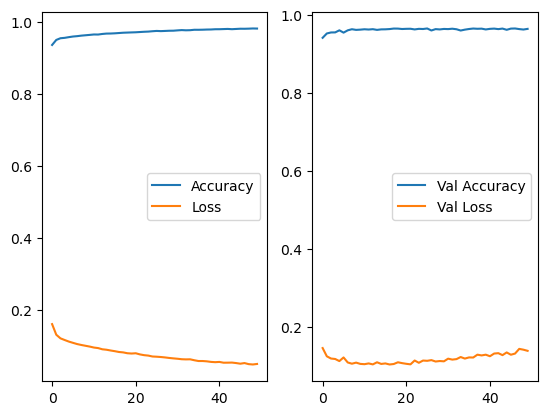

In [15]:
from matplotlib import pyplot as plt

plt.subplot(121)
plt.plot(history["accuracy"],label="Accuracy")
plt.plot(history["loss"],label="Loss")
plt.legend()

plt.subplot(122)
plt.plot(history["val_accuracy"],label="Val Accuracy")
plt.plot(history["val_loss"],label="Val Loss")
plt.legend()

plt.show()

In [18]:
import joblib
joblib.dump(deep_model, 'models/classifier-v1')
print("Model Saved Successfully")

Model Saved Successfully
